# Filter

In [2]:
import urllib.request
url = 'https://images.unsplash.com/photo-1597143720565-bced1f64936d?ixid=MXwxMjA3fDB8MHxzZWFyY2h8MTIwfHxiZWF1dHl8ZW58MHx8MHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60'
filename = './image/Akbari.jpg'
urllib.request.urlretrieve(url, filename)

('./image/Akbari.jpg', <http.client.HTTPMessage at 0x7f8da02755b0>)

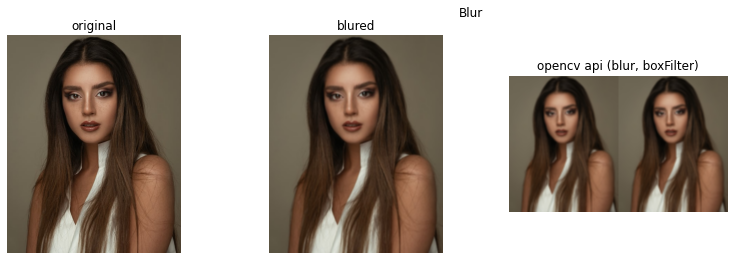

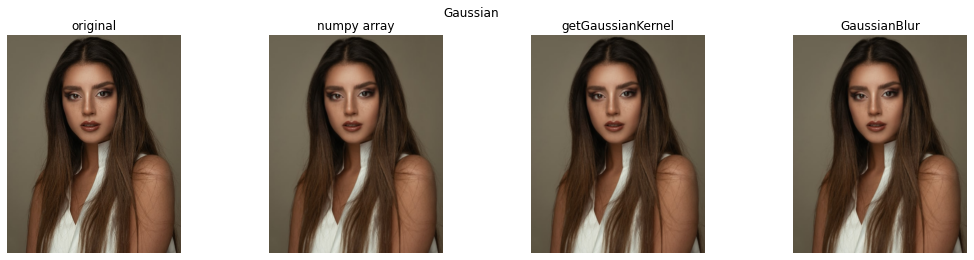

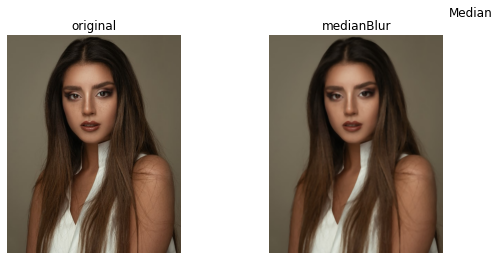

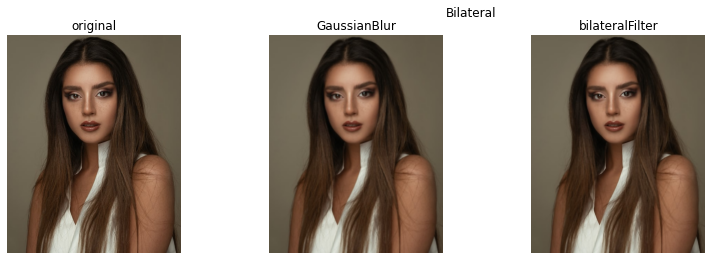

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

"""
Blur
"""

img = cv2.imread('./image/Akbari.jpg')

"""
kernel = np.array( [ [0.04, 0.04, 0.04, 0.04, 0.04], 
                     [0.04, 0.04, 0.04, 0.04, 0.04], 
                     [0.04, 0.04, 0.04, 0.04, 0.04], 
                     [0.04, 0.04, 0.04, 0.04, 0.04], 
                     [0.04, 0.04, 0.04, 0.04, 0.04] ])
"""
kernel = np.ones((5,5)) / (5**2)

blured = cv2.filter2D(img, -1, kernel)

blured1 = cv2.blur(img, (10,10))
blured2 = cv2.boxFilter(img, -1, (10,10))

blured_cv_api = np.hstack( ( blured1, blured2 ) )

imgs = {'original' : img, 
        'blured': blured,
        'opencv api (blur, boxFilter)': blured_cv_api,}

plt.figure(figsize=(18,4))
plt.suptitle("Blur")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Gaussian
"""

k1 = np.array( [ [1,2,1], 
                 [2,4,2], 
                 [1,2,1], ]) * (1/16)
blur1 = cv2.filter2D(img, -1, k1)

k2 = cv2.getGaussianKernel(3,0)
blur2 = cv2.filter2D(img, -1, k2*k2.T)

blur3 = cv2.GaussianBlur(img, (3,3), 0)

imgs = {'original' : img, 
        'numpy array': blur1,
        'getGaussianKernel': blur2,
        'GaussianBlur': blur3,}

plt.figure(figsize=(18,4))
plt.suptitle("Gaussian")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Median
"""

blur = cv2.medianBlur(img, 5)
imgs = {'original' : img, 
        'medianBlur': blur,
        }

plt.figure(figsize=(18,4))
plt.suptitle("Median")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Bilateral
"""
blur1 = cv2.GaussianBlur(img, (5,5), 0)
blur2 = cv2.bilateralFilter(img, 5, 75, 75)
imgs = {'original' : img, 
        'GaussianBlur': blur1,
        'bilateralFilter': blur2,
        }

plt.figure(figsize=(18,4))
plt.suptitle("Bilateral")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()

In [21]:
import urllib.request
url = 'https://images.unsplash.com/photo-1517282210088-b67746064aa1?ixid=MXwxMjA3fDB8MHxzZWFyY2h8MTZ8fGdyaWR8ZW58MHx8MHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60'
filename = './image/storefront.jpg'
urllib.request.urlretrieve(url, filename)

('./image/storefront.jpg', <http.client.HTTPMessage at 0x7f8d5c23b970>)

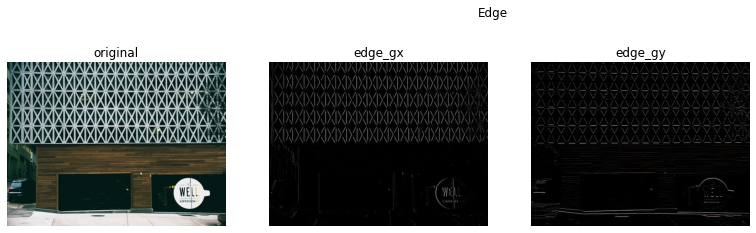

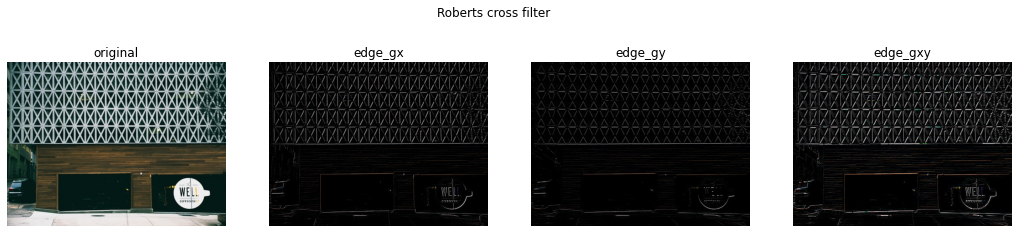

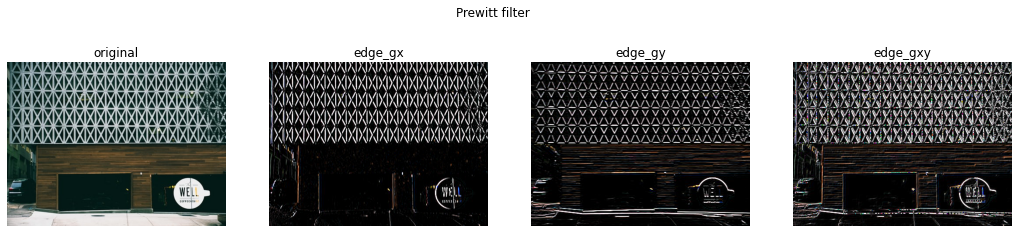

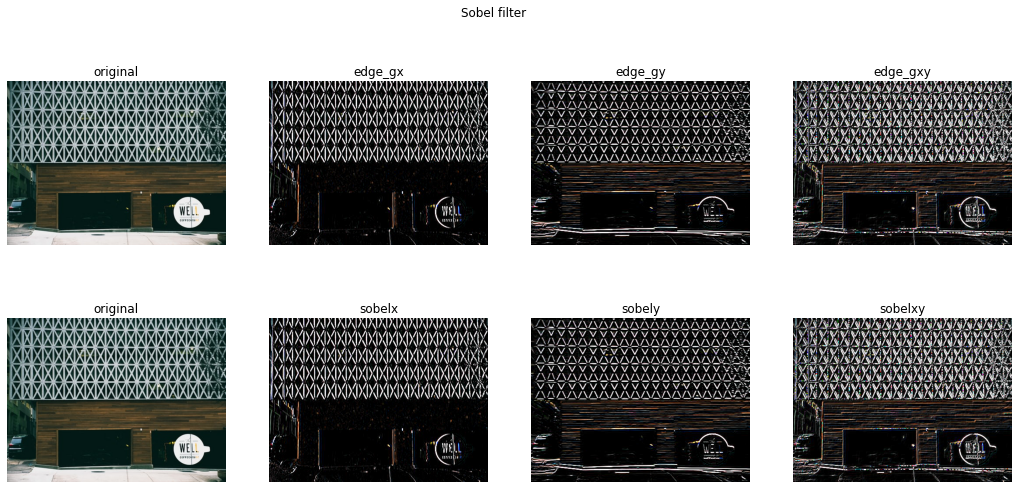

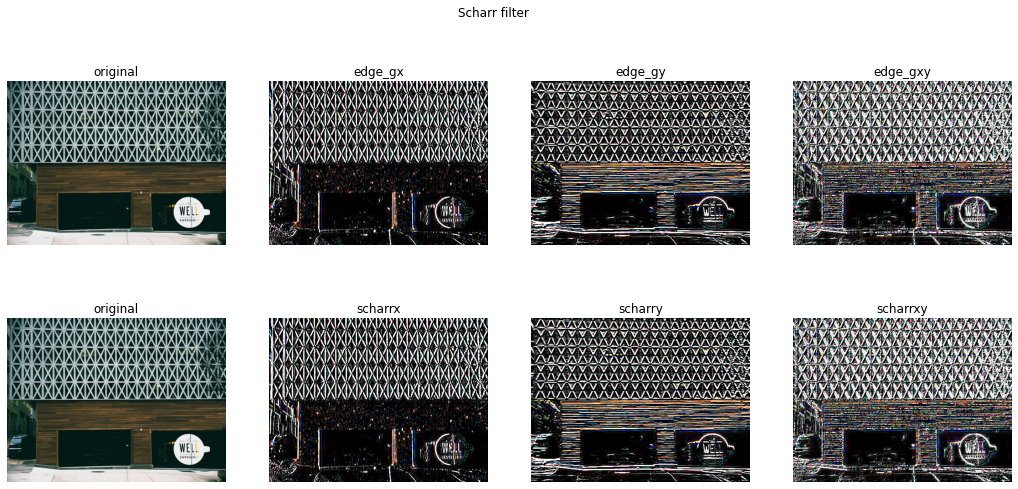

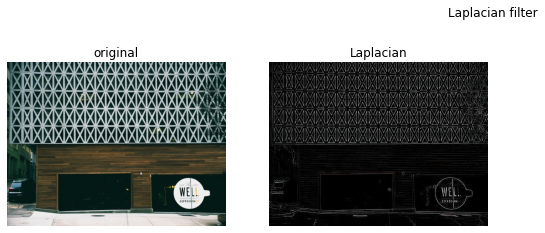

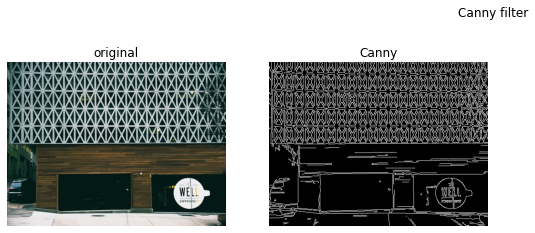

In [32]:
"""
Edge
"""
import cv2
import numpy as np

img = cv2.imread("./image/storefront.jpg")
gx_kernel = np.array([[-1,1]])
gy_kernel = np.array([[-1], [1]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)

imgs = {'original' : img, 
        'edge_gx': edge_gx,
        'edge_gy': edge_gy,
        }

plt.figure(figsize=(18,4))
plt.suptitle("Edge")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Roberts cross filter
"""
gx_kernel = np.array([[1, 0], [0, -1]])
gy_kernel = np.array([[1, 0], [-1, 0]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)
edge_gxy = edge_gx + edge_gy
imgs = {'original' : img, 
        'edge_gx': edge_gx,
        'edge_gy': edge_gy,
        'edge_gxy': edge_gxy
        }

plt.figure(figsize=(18,4))
plt.suptitle("Roberts cross filter")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Prewitt filter
"""
gx_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
gy_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)
edge_gxy = edge_gx + edge_gy
imgs = {'original' : img, 
        'edge_gx': edge_gx,
        'edge_gy': edge_gy,
        'edge_gxy': edge_gxy
        }

plt.figure(figsize=(18,4))
plt.suptitle("Prewitt filter")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Sobel filter
"""
gx_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gy_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)
edge_gxy = edge_gx + edge_gy

sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(img, -1, 0, 1, ksize=3)
sobelxy = sobelx + sobely

imgs1 = {'original' : img, 
        'edge_gx': edge_gx,
        'edge_gy': edge_gy,
        'edge_gxy': edge_gxy
        }

imgs2 = {'original' : img, 
         'sobelx': sobelx,
         'sobely': sobely,
         'sobelxy': sobelxy
        }

plt.figure(figsize=(18,8))
plt.suptitle("Sobel filter")
for i, (k, v) in enumerate(imgs1.items()):
    plt.subplot(2,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
for i, (k, v) in enumerate(imgs2.items()):
    plt.subplot(2,4,i+5)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
    

"""
Scharr filter
"""
gx_kernel = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
gy_kernel = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)
edge_gy = cv2.filter2D(img, -1, gy_kernel)
edge_gxy = edge_gx + edge_gy

scharrx = cv2.Scharr(img, -1, 1, 0)
scharry = cv2.Scharr(img, -1, 0, 1)
scharrxy = scharrx + scharry

imgs1 = {'original' : img, 
        'edge_gx': edge_gx,
        'edge_gy': edge_gy,
        'edge_gxy': edge_gxy
        }

imgs2 = {'original' : img, 
         'scharrx': scharrx,
         'scharry': scharry,
         'scharrxy': scharrxy
        }

plt.figure(figsize=(18,8))
plt.suptitle("Scharr filter")
for i, (k, v) in enumerate(imgs1.items()):
    plt.subplot(2,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
for i, (k, v) in enumerate(imgs2.items()):
    plt.subplot(2,4,i+5)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
    
"""
Laplacian filter
"""
edge = cv2.Laplacian(img, -1)
imgs = {'original' : img, 
        'Laplacian': edge,
        }

plt.figure(figsize=(18,4))
plt.suptitle("Laplacian filter")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()

"""
Canny filter
"""
edge = cv2.Canny(img, 100, 200)
imgs = {'original' : img, 
        'Canny': edge,
        }

plt.figure(figsize=(18,4))
plt.suptitle("Canny filter")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()
